Imports:
Importieren der nötigen Pakete für die Minichallenge

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision as tv
import unittest

##Aufgabe 1
Laden des MNIST Datensatzes, einmal um das spätere Model zu trainieren und einmal um es zu testen.

In [2]:
MNIST_dataset_train = tv.datasets.MNIST(root='./data', train=True, download=True)

MNIST_dataset_test = tv.datasets.MNIST(root='./data', train=False, download=True)

Übersicht über die Daten bekommen mithilfe von Matplotlib

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

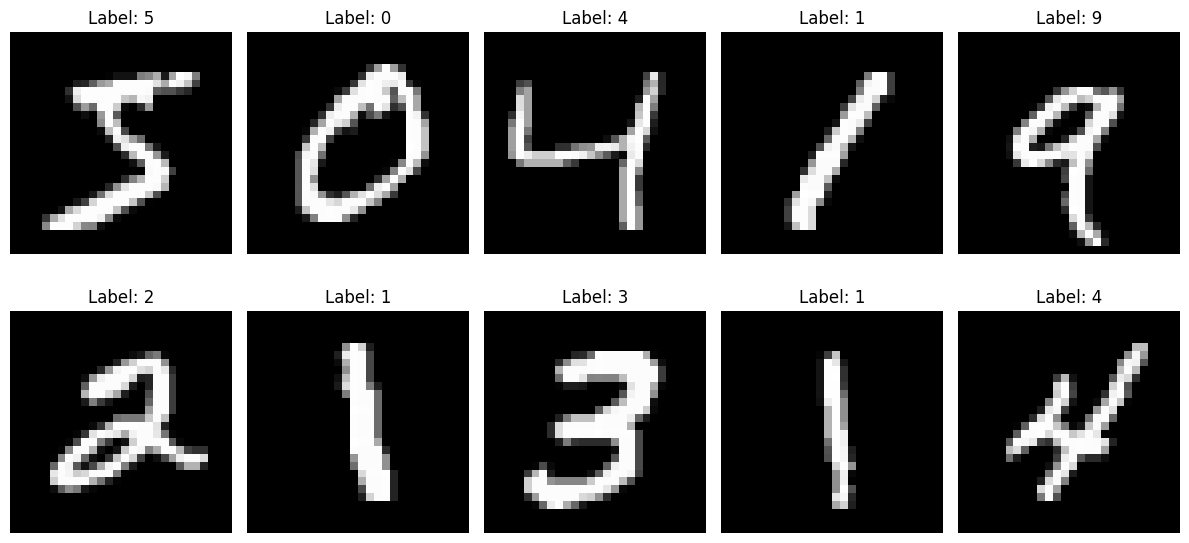

In [3]:
# Konvertieren des MNIST-Datensatzes in ein NumPy-Array
images = []
labels = []
for i in range(len(MNIST_dataset_train)):
    img, label = MNIST_dataset_train[i]
    images.append(np.array(img))
    labels.append(label)
print(images[1])    

# Anzeigen der ersten 10 Bilder mit Matplotlib

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Hier ist sind nun die ersten Zehn Bilder aus dem Datensatz, diese bestehen aus einem 28x28 pixel grossem Bild und zeigen alle eine von hand geschriebene Zahl. Im Hintergrund sind die Daten wie oben für ein Bild angegeben als Arrays gespeichert. Wenn die Zahl 0 ist ist der Pixel schwarz, je heller der Pixel ist, desto grösser ist die Zahl im Hintergrund. Nun wollen wir auch noch anschauen, wie gross der Datensatz ist und wie die Zahlen verteilt sind.

In [4]:
print("Die Größe des Trainingsdatensatzes beträgt:", len(MNIST_dataset_train))

print("Die Größe des Testsdatensatzes beträgt:", len(MNIST_dataset_test))

Die Größe des Trainingsdatensatzes beträgt: 60000
Die Größe des Testsdatensatzes beträgt: 10000


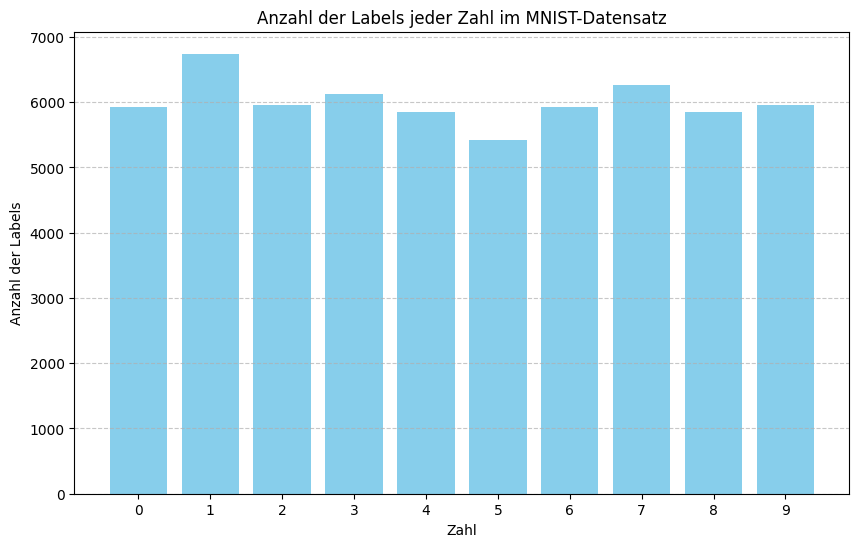

In [5]:
class_counts = {i: 0 for i in range(10)}
for img, label in MNIST_dataset_train:
    class_counts[label] += 1

digits = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(digits, counts, color='skyblue')
plt.xlabel('Zahl')
plt.ylabel('Anzahl der Labels')
plt.title('Anzahl der Labels jeder Zahl im MNIST-Datensatz')
plt.xticks(digits)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Aufgabe 2

In [2]:
class linear_layer:
    def __init__(self, input_size, output_size):
        np.random.seed(123)
        self.weights = np.random.randn(input_size, output_size)  # Initialisierung der Gewichte
        self.bias = np.random.randn(1, output_size)  # Initialisierung des Bias
    
    def forward(self, inputs):
        self.inputs = inputs
        self.outputs = np.dot(inputs, self.weights) + self.bias
        return self.outputs

    def backward(self, d_outputs):
        n = input_size
        self.d_weights = (1/n) * np.dot(d_outputs, self.inputs.T)
        self.d_bias = (1/n) * np.sum(d_outputs, axis=1)
        self.d_inputs = np.dot(d_outputs, self.weights.T)
        return self.d_inputs

    def update_parameters(self, learning_rate):
        self.weights -= learning_rate * self.d_weights
        self.bias -= learning_rate * self.d_bias

Erstellung der Linear layer Klasse:
Mit dem init werden die Grundeigenschaften der Klasse Definiert, dabei werden die Gewichte und der Bias zufällig ausgewählt. Bei der Forward Funktion werden die Inputs angegeben, und die Outputs Berechnet. Um dann anschliessend die die anpassungen vornehmen zu können brauchen wir die backward Funktion, diese schaut sich die Outputs an und gibt dann an, wo wir wieviel korrigieren müssen. Zuletzt korrigieren wir anhand der im backward ausgerechneten werten und einer learning_rate die Parameter.


In [12]:
test_inputs = np.array([[1., 2.],[-2., -1]])
test_weights = np.array([[2., 3.], [-1., 4.]])
test_bias = np.array([1., 2.])
test_d_outputs = np.array([[4., 3.], [2., 1.]])

print("Test Forward ist:", np.dot(test_inputs, test_weights)+test_bias)
print("\nTest für Backward:")
print("dw ist:", (1/2) * np.dot(test_d_outputs, test_inputs.T))
print("db ist:", (1/2) * np.sum(test_d_outputs, axis=1))
print("dx ist:", np.dot(test_d_outputs, test_weights.T))
print("\nTest für Updates mit Learningrate 1:")
print("Weights nach Update:", test_weights - (1/2) * np.dot(test_d_outputs, test_inputs.T))
print("Bias nach Update:", test_bias - (1/2) * np.sum(test_d_outputs, axis=1))

Test Forward ist: [[ 1. 13.]
 [-2. -8.]]

Test für Backward:
dw ist: [[ 5.  -5.5]
 [ 2.  -2.5]]
db ist: [3.5 1.5]
dx ist: [[17.  8.]
 [ 7.  2.]]

Test für Updates mit Learningrate 1:
Weights nach Update: [[-3.   8.5]
 [-3.   6.5]]
Bias nach Update: [-2.5  0.5]


##Aufgabe 3